### How Grouped Feature Importance Can Help You Understand Your Models 

In this notebook we illustrate with an example, how grouped feature importance can identify fundamental problems with your model. We shoud you how easy it is to use the module and compare the process to SHAP

We first import the relevant modules 

In [28]:
from example import grouped_feature_importance

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np

We now construct a dataset of three features, each of our features can take one of three integer. Our binary y target variable takes 1 id 'Feature 2' is equal to and 0 otherwise. Our function is therefore entirely dependent on Feature 2. However, below we demonstrate how grouped feature importance can help developers identify importances in their dataset as well as in the model. 

In [29]:
def create_custom_dataframe():
    num_rows = 500
    data = {
        'Feature_0': np.random.choice([0,1,2], size=num_rows),  # Categorical feature with 3 unique values
        'Feature_1': np.random.choice([0,1,2], size=num_rows),   # Categorical feature with 3 unique values
        'Feature_2': np.random.choice([0,1,2], size=num_rows)      # Continuous feature
    }
    
    X = pd.DataFrame(data)
    #y = np.random.choice([0, 1], size=num_rows)  # Binary target
    y = [1 if i > 1 else 0 for i in X['Feature_2']]
    return X, y

Given our dataset of three categorical variables we now synthesise a situation where we have a sparsity weakness in our dataset. We remove all data points where 'Feature 2' == 0 and 'Feature_0' == 0. As our feature importance measures are calculated using the change in model performance (in this case accuracy for our classifier) when a particular feature is removed for a set of test data, if we group our feature importance over values of Feature_0, we are hoping that our importances will reveal that our model is highly unstable when Feature_0 == 0. 

In [30]:
X,y = create_custom_dataframe()
selected_X = X[X['Feature_2'] < 1]
selected_X = selected_X.index[selected_X['Feature_0'] < 1]
X = X.drop(selected_X)
y = np.array([y[i] for i in X.index])
X = X.reset_index()
X = X.drop('index',axis=1)

Below is a scatter plot showing our data manifold for features Feature_0 and Feature_2

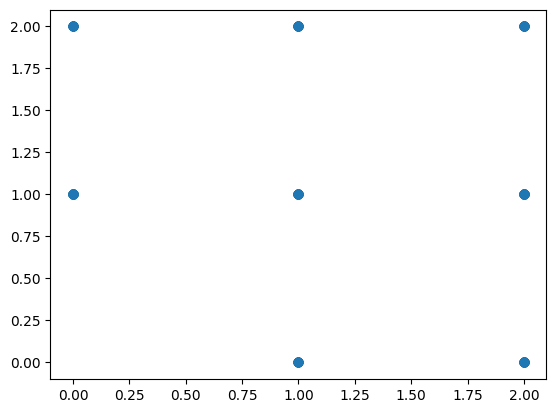

In [31]:
import matplotlib.pyplot as plt
plt.scatter(X['Feature_0'],X['Feature_2'])

We train a RFC on our data to replicate our simple function with perfect accuracy

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = RandomForestClassifier(n_estimators=2, random_state=42)
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0

We run our grouped feature importance module using X_test, y_test and our trained model. We select Feature_0 as our feature ww would like to group over and allow the number of categories to be selected automatically

In [33]:
app = grouped_feature_importance(X_test,y_test,model,'Feature_0')

in dynamic


We then run our returned plotly Dash APP which shows us our interesting results. By selecting different values of Feature_0, we can see that for the part of our data distribution which are well defined, the feature importances correctly identify Feature_2 as the most important feature. However, for the part of the data distribution which is is ill defined (Feature_0 is 0 and Feature_2 is 0) our feature importances are different, with even importances over each feature indicating that for this group of data, the function is behaving differently. While we cannot tell exactly why our function is behaving differently for this group of data, we can use these insights to inspect and improve our models 

In [34]:
app.run()